In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../../../src/data/task1-data-collection/belgrade_precipitation_2010_2020.csv')
df

,Unnamed: 0,Date,Precipitation (mm)
0,0,2010-01-01,10.5
1,1,2010-01-02,17.4
2,2,2010-01-03,11.0
3,3,2010-01-04,0.0
4,4,2010-01-05,11.6
...,...,...,...
4013,4013,2020-12-27,0.0
4014,4014,2020-12-28,0.1
4015,4015,2020-12-29,2.2
4016,4016,2020-12-30,8.3


In [3]:
df = df.iloc[:, 1:]
df

,Date,Precipitation (mm)
0,2010-01-01,10.5
1,2010-01-02,17.4
2,2010-01-03,11.0
3,2010-01-04,0.0
4,2010-01-05,11.6
...,...,...
4013,2020-12-27,0.0
4014,2020-12-28,0.1
4015,2020-12-29,2.2
4016,2020-12-30,8.3


In [4]:
df.shape

(4018, 2)

### Task 1: 
Check data-types of features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4018 non-null   object 
 1   Precipitation (mm)  4018 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.9+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
print("Start: ", df['Date'].min())
print("End: ", df['Date'].max())

Start:  2010-01-01 00:00:00
End:  2020-12-31 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4018 non-null   datetime64[ns]
 1   Precipitation (mm)  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.9 KB


Data is between 2010-01-01 and 2020-12-31

### Task 2
Check duplicate, handle missing values

In [8]:
df.isnull().values.any()

False

In [9]:
dup = df[df.duplicated()]
dup

,Date,Precipitation (mm)


1. No duplicate values
2. No missing values

### Task 3
Five point summary

In [10]:
df.describe()

,Precipitation (mm)
count,4018.000000
mean,2.751543
std,5.920144
min,0.000000
25%,0.000000
50%,0.200000
75%,2.800000
max,94.000000


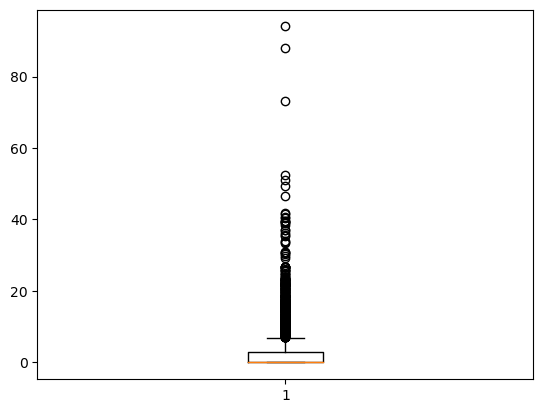

In [11]:
plt.boxplot(df['Precipitation (mm)'])
plt.show()

In [12]:
# Box Plot on scaled data
# df_z_scaled = df.copy()

# column = "Precipitation (mm)"
# df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()

# plt.boxplot(df_z_scaled[column])
# plt.show()

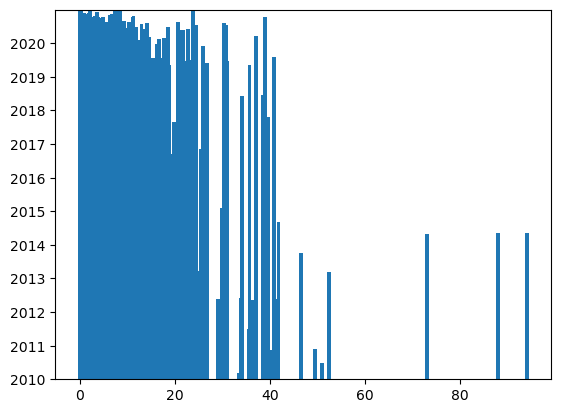

In [13]:
plt.ylim(df['Date'].min(), df['Date'].max())
plt.bar(df['Precipitation (mm)'], df['Date'])
plt.show()

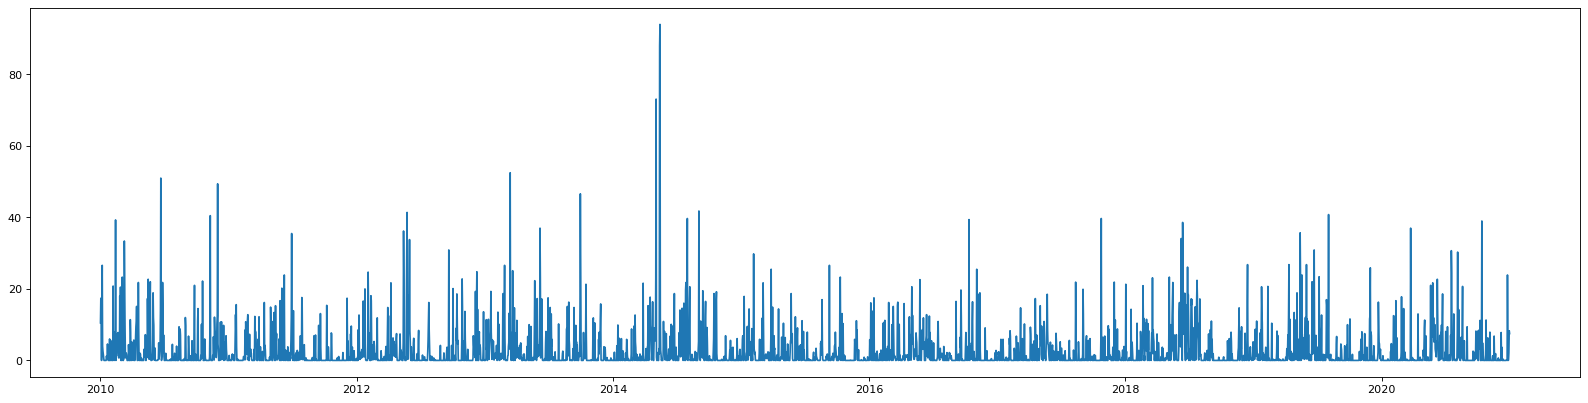

In [14]:
from matplotlib.pyplot import figure

figure(figsize=(25, 6), dpi=80)
plt.plot(df['Date'], df['Precipitation (mm)'])
plt.show()

There are many outliers

As mentioned in Task 8, Box-plot and Skewness should not be altered as mentioned in books - could be a indicator for flood

#### Outlier Analysis

In [15]:
df.set_index('Date', inplace = True)
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [16]:
outliers = find_outliers_IQR(df)
print("Max outlier value:\n"+ str(outliers.max()))
print()
print("Min outlier value:\n"+ str(outliers.min()))

Max outlier value:
Precipitation (mm)    94.0
dtype: float64

Min outlier value:
Precipitation (mm)    7.0
dtype: float64


### Task 7
Monthly, Daily water level plot and analysis at each check point

We analyse max and mean values, as min is always 0.0 in the considered time ranges.

Monthly value analysis

In [17]:
df.resample(rule='M').max()

,Precipitation (mm)
Date,
2010-01-31,26.6
2010-02-28,39.3
2010-03-31,33.4
2010-04-30,21.8
2010-05-31,22.7
...,...
2020-08-31,30.3
2020-09-30,9.4
2020-10-31,39.0


In [18]:
df.resample(rule='M').mean()

,Precipitation (mm)
Date,
2010-01-31,3.535484
2010-02-28,5.775000
2010-03-31,4.603226
2010-04-30,3.323333
2010-05-31,4.770968
...,...
2020-08-31,3.477419
2020-09-30,1.110000
2020-10-31,3.825806


<AxesSubplot:xlabel='Date'>

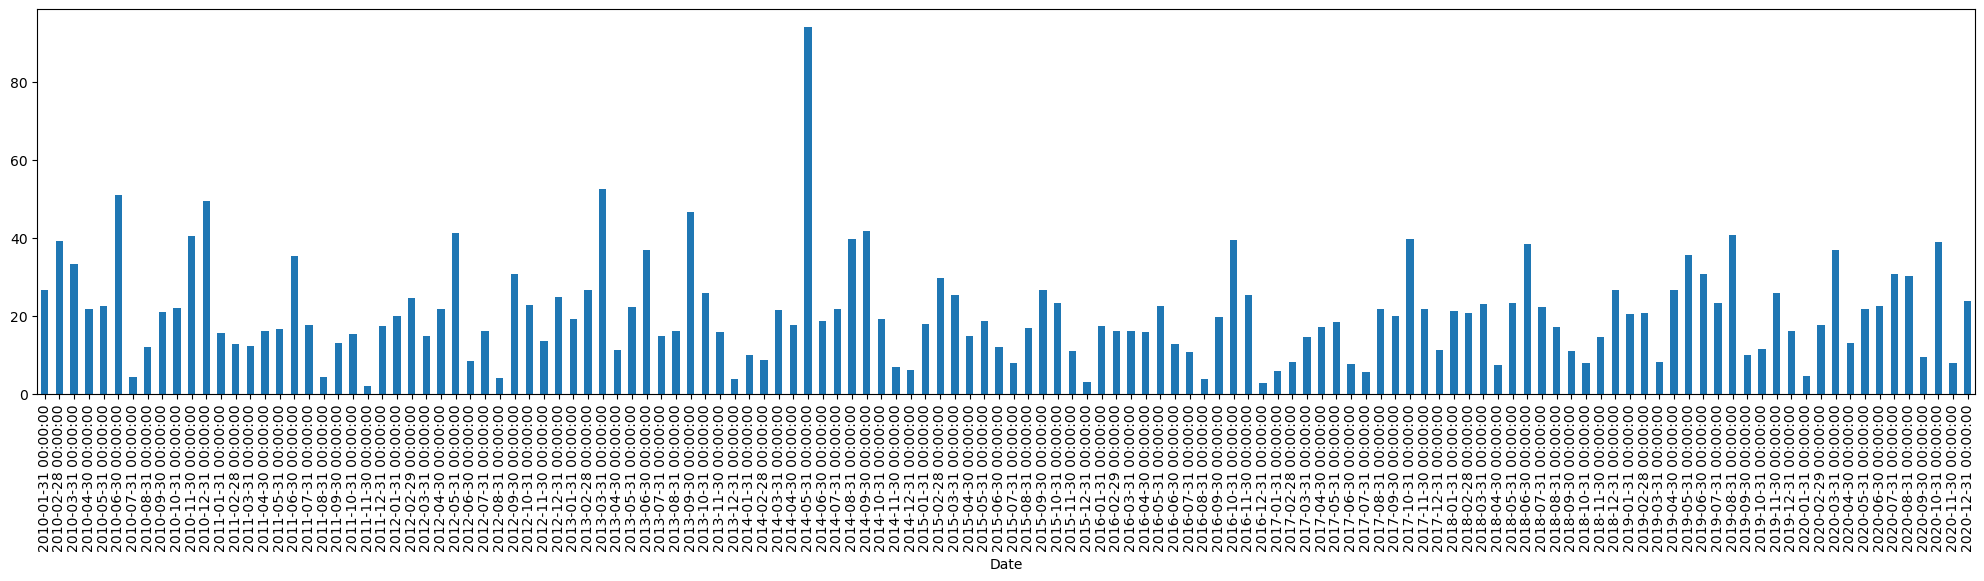

In [19]:
# Max precipitation values every month
df['Precipitation (mm)'].resample(rule='M').max().plot(kind='bar', figsize=(25,5))

<AxesSubplot:xlabel='Date'>

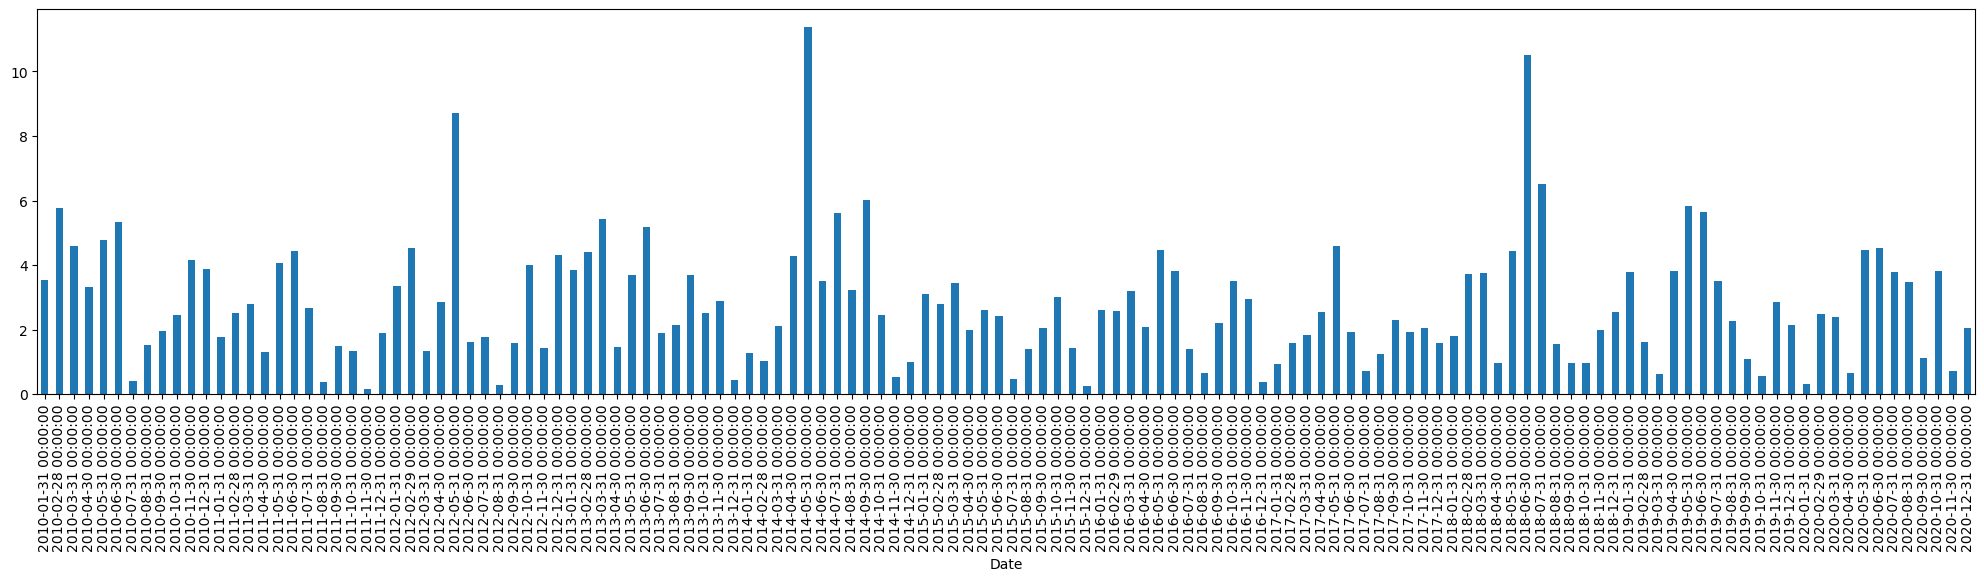

In [20]:
# Mean precipitation values every month
df['Precipitation (mm)'].resample(rule='M').mean().plot(kind='bar', figsize=(25,5))

Yearly value analysis

In [21]:
df.resample(rule='Y').max()

,Precipitation (mm)
Date,
2010-12-31,51.0
2011-12-31,35.5
2012-12-31,41.4
2013-12-31,52.5
2014-12-31,94.0
2015-12-31,29.8
2016-12-31,39.4
2017-12-31,39.7
2018-12-31,38.6


In [22]:
df.resample(rule='Y').mean()

,Precipitation (mm)
Date,
2010-12-31,3.454247
2011-12-31,2.067123
2012-12-31,2.985519
2013-12-31,3.118082
2014-12-31,3.552603
2015-12-31,2.071507
2016-12-31,2.480055
2017-12-31,1.931507
2018-12-31,3.304384


<AxesSubplot:xlabel='Date'>

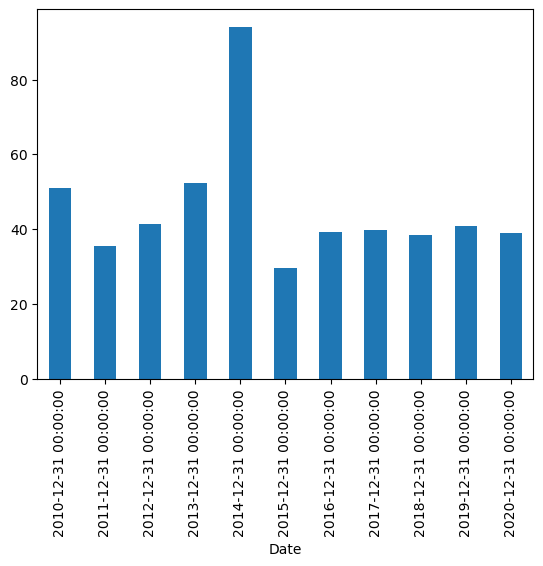

In [23]:
# Max precipitation values every year
df['Precipitation (mm)'].resample(rule='Y').max().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

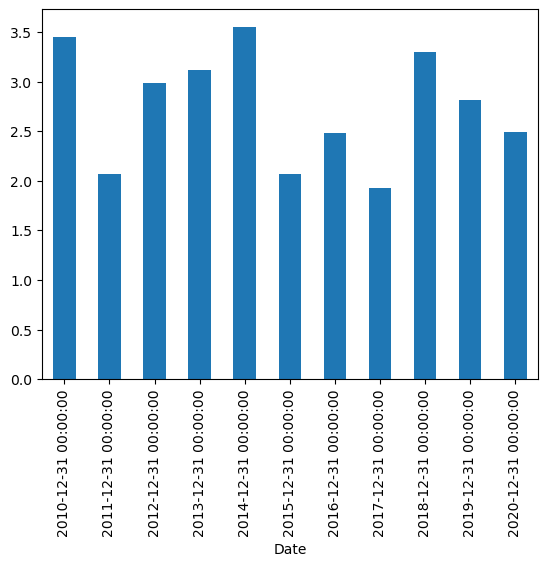

In [24]:
# Mean precipitation values every year
df['Precipitation (mm)'].resample(rule='Y').mean().plot(kind='bar')